In [1]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, BatchNormalization
from keras.layers import Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
import os, glob, numpy as np
from PIL import Image
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

Using TensorFlow backend.


In [2]:
df = pd.read_csv('/Users/김동휘/Desktop/머신러닝/term project/2nd/train4.csv')

In [3]:
df.head()

,label,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
0,2,169,171,170,177,181,182,181,185,194,...,176,184,186,185,180,157,140,140,159,165
1,2,19,57,105,140,149,148,144,155,170,...,181,172,175,160,144,114,89,47,18,18
2,2,155,163,161,167,167,172,155,152,165,...,162,163,178,157,166,167,148,141,136,115
3,2,25,71,116,139,136,153,148,161,172,...,142,125,135,138,137,111,71,32,16,16
4,2,129,162,181,196,205,208,205,213,225,...,211,210,197,172,190,195,193,181,147,88


In [4]:
df.describe()

,label,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,...,pixel0774,pixel0775,pixel0776,pixel0777,pixel0778,pixel0779,pixel0780,pixel0781,pixel0782,pixel0783
count,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,...,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000,11799.000000
mean,3.604204,145.904060,151.994152,157.198915,160.958386,164.141283,166.865667,168.876600,170.437156,171.497246,...,167.911009,167.161115,166.093482,164.791593,163.044495,160.416815,156.421900,151.585643,145.734893,139.636071
std,1.513337,48.636508,43.679127,38.862758,35.192340,31.738377,28.297005,26.259144,25.228942,24.562249,...,24.776161,25.181849,25.704592,26.506532,27.686019,30.044390,34.825333,40.302534,45.648508,50.021271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,131.000000,137.000000,143.000000,146.000000,149.000000,152.000000,154.000000,155.000000,157.000000,...,153.000000,152.000000,151.000000,149.000000,147.000000,145.000000,141.000000,137.000000,131.000000,124.000000
50%,4.000000,159.000000,162.000000,164.000000,166.000000,168.000000,169.000000,171.000000,172.000000,173.000000,...,169.000000,168.000000,167.000000,166.000000,165.000000,163.000000,162.000000,159.000000,156.000000,153.000000
75%,4.000000,177.000000,179.000000,181.000000,182.000000,184.000000,185.000000,186.000000,186.000000,187.000000,...,184.000000,183.000000,182.500000,182.000000,181.000000,179.000000,178.000000,176.000000,174.000000,172.000000
max,6.000000,247.000000,248.000000,252.000000,253.000000,255.000000,255.000000,254.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,253.000000,252.000000,254.000000,252.000000,251.000000


In [5]:
df['label'].value_counts()

4    6703
2    1657
6    1566
1     906
0     457
5     284
3     226
Name: label, dtype: int64

In [6]:
data_aug_rate = [14,7,4,30,0,23,4]
for i in range(7):
    if data_aug_rate[i]:
        df=df.append([df.loc[df['label'] == i,:]]*(data_aug_rate[i]-1), ignore_index=True)
df['label'].value_counts()

3    6780
4    6703
2    6628
5    6532
0    6398
1    6342
6    6264
Name: label, dtype: int64

In [7]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
x_train , x_test , y_train , y_test = train_test_split(X, Y)

x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)
print(y_train[0])

Train:  (34235, 28, 28, 1)
Test:  (11412, 28, 28, 1)
[0. 0. 0. 0. 1. 0. 0.]


In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode = 'max', save_best_only =True)

In [9]:
model.compile(optimizer=keras.optimizers.Adadelta(), loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)       

In [10]:
batch_size = 64
epochs = 50
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                              verbose=1, validation_split=0.1)

Train on 30811 samples, validate on 3424 samples
Epoch 1/50
30811/30811 [==============================] - 84s 3ms/step - loss: 1.8021 - accuracy: 0.4107 - val_loss: 4.4321 - val_accuracy: 0.1831
Epoch 2/50
30811/30811 [==============================] - 82s 3ms/step - loss: 1.0064 - accuracy: 0.6357 - val_loss: 0.8621 - val_accuracy: 0.6694
Epoch 3/50
30811/30811 [==============================] - 82s 3ms/step - loss: 0.6862 - accuracy: 0.7444 - val_loss: 0.7258 - val_accuracy: 0.7293
Epoch 4/50
30811/30811 [==============================] - 82s 3ms/step - loss: 0.5295 - accuracy: 0.7989 - val_loss: 0.6571 - val_accuracy: 0.7769
Epoch 5/50
30811/30811 [==============================] - 83s 3ms/step - loss: 0.4205 - accuracy: 0.8394 - val_loss: 0.3849 - val_accuracy: 0.8557
Epoch 6/50
30811/30811 [==============================] - 84s 3ms/step - loss: 0.3516 - accuracy: 0.8678 - val_loss: 0.3348 - val_accuracy: 0.8703
Epoch 7/50
30811/30811 [==============================] - 82s 3ms/ste

In [11]:
model.evaluate(x_test, y_test)

11412/11412 [==============================] - 7s 624us/step


[0.14512854310915776, 0.9708201885223389]

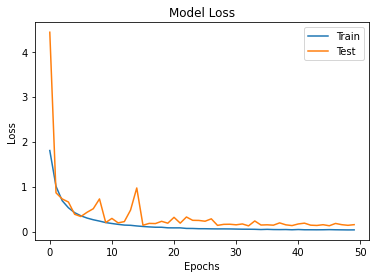

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

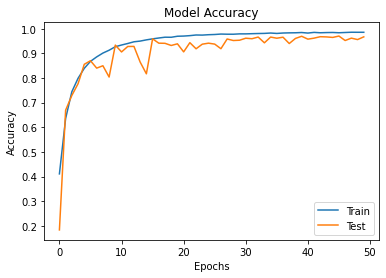

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
prediction = model.predict(x_test, batch_size=64)
pred_bool = np.argmax(prediction, axis=1)
y_test_con = np.argmax(y_test, axis=1)
labels = ['akiec', 'bcc', 'bkl', 'df', 'nv', 'vasc','mel']
confusion_matrix(y_test_con,pred_bool)

array([[1628,    0,    0,    0,    0,    0,    0],
       [   0, 1585,    0,    0,    0,    0,    0],
       [   4,    0, 1557,    0,   22,    0,   62],
       [   0,    0,    0, 1704,    0,    0,    0],
       [   5,    9,   46,    1, 1549,   15,   76],
       [   0,    0,    0,    0,    0, 1593,    0],
       [   0,    3,   55,    0,   32,    3, 1463]], dtype=int64)

In [53]:
print(classification_report(y_test_con,pred_bool, target_names=labels))

              precision    recall  f1-score   support

       akiec       0.99      1.00      1.00      1628
         bcc       0.99      1.00      1.00      1585
         bkl       0.94      0.95      0.94      1645
          df       1.00      1.00      1.00      1704
          nv       0.97      0.91      0.94      1701
        vasc       0.99      1.00      0.99      1593
         mel       0.91      0.94      0.93      1556

    accuracy                           0.97     11412
   macro avg       0.97      0.97      0.97     11412
weighted avg       0.97      0.97      0.97     11412

